Demonstrates the Bernstein-Vazirani algorithm.
The (non-recursive) Bernstein-Vazirani algorithm takes a black-box oracle
implementing a function $f(x) = s·x + b$ (mod 2), where $b$ is 0 or 1,
$s$ and $x$ are vectors with all elements equal to 0 or 1, and the
algorithm solves for $x$ in a single query to the oracle.

In [1]:
!pip install cirq --quiet

     |████████████████████████████████| 1.4MB 8.9MB/s 


In [5]:
import cirq
import random

from cirq import H, X, CNOT, measure
from cirq.contrib.svg import SVGCircuit

%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
def qunatum_oracle (input_qubits, output_qubit, secret_factor_bits, secret_bias_bit):
    
    if secret_bias_bit:
        yield cirq.X(output_qubit)  

    for qubit, bit in zip(input_qubits, secret_factor_bits):  
      if bit:
        yield CNOT(qubit, output_qubit) 

In [27]:
def deutch_jozsa_circuit(input_qubits, output_qubit, oracle):
    """Solves for factors in f(x)= s x + b mod (2) with one query."""
    c = cirq.Circuit()
    # First qubits
    c.append([X(output_qubit), H(output_qubit), H.on_each(*input_qubits)]);  
    # query oracle
    c.append(oracle);
    # Measure in X basis.
    c.append([H.on_each(*input_qubits), measure(*input_qubits, key='result')]);
    return c; 

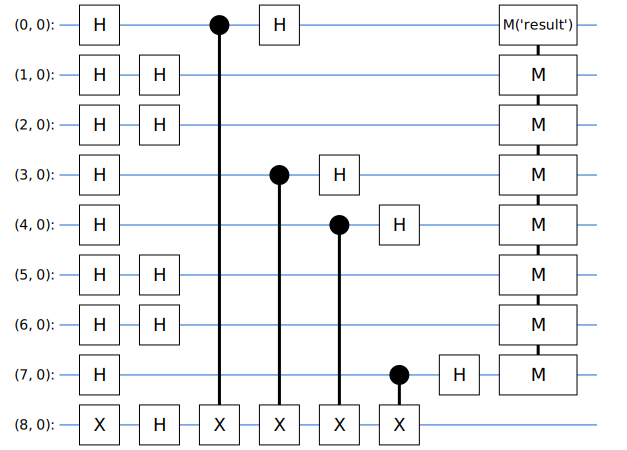

In [36]:
# Nuber of quibits
quibit_number = 8
# Choose qubits to use.
input_qubits = [cirq.GridQubit(i,0) for i in range(quibit_number)]
output_qubit = cirq.GridQubit(quibit_number,0)
# Secret bit
secret_bias_bit = random.randint(0, 1)
# Initializing secret function 
# Secret function: f(x) 
secret_factor_bits = [random.randint(0, 1) for _ in range(quibit_number)]
 # Implementing oracle
oracle = qunatum_oracle(input_qubits, output_qubit, secret_factor_bits, secret_bias_bit)
# Deutsch-Jozsa circuit
circuit = deutch_jozsa_circuit(input_qubits, output_qubit, oracle)
SVGCircuit(circuit)

In [37]:
print('Secret function:\nf(x) = <{}> + {} mod 2'.format(', '.join(str(e) for e in secret_factor_bits), secret_bias_bit))

Secret function:
f(x) = <1, 0, 0, 1, 1, 0, 0, 1> + 0 mod 2


In [38]:
def bitstring(bits):
    return ''.join(str(int(b)) for b in bits)

In [39]:
# Simulate the circuit.
simulator = cirq.Simulator()
# Repetitions
circuit_sample_count = 3
result = simulator.run(circuit, repetitions = circuit_sample_count) 

Result of simulation
result=111, 000, 000, 111, 111, 000, 000, 111


In [52]:
frequencies = result.histogram(key='result', fold_func=bitstring)
#print('Sampled results:\n{}'.format(frequencies))
# Print input s and output s
print(' Input s = {}'.format(', '.join(str(e) for e in secret_factor_bits)))
print('Output s = {}'.format(', '.join(str(e) for e in frequencies.most_common(1)[0][0]))) 

 Input s = 1, 0, 0, 1, 1, 0, 0, 1
Output s = 1, 0, 0, 1, 1, 0, 0, 1
